In [73]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from influxdb import DataFrameClient
from datetime import datetime
import time

In [97]:
df=pd.read_csv('eplusout.csv')
df.head()

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),Environment:Site Outdoor Air Dewpoint Temperature [C](TimeStep),Environment:Site Outdoor Air Dewpoint Temperature [C](Hourly),Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep),Environment:Site Outdoor Air Barometric Pressure [Pa](Hourly),Environment:Site Wind Speed [m/s](TimeStep),Environment:Site Wind Speed [m/s](Hourly),Environment:Site Wind Direction [deg](TimeStep),...,Carbon Equivalent:Facility [kg](Hourly),DistrictCooling:Facility [J](TimeStep),DistrictHeating:Facility [J](TimeStep),Carbon Equivalent:Facility [kg](TimeStep),BLOCK1:BEDROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](TimeStep),BLOCK1:BEDROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),BLOCK1:BATHROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](TimeStep),BLOCK1:BATHROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),BLOCK1:KITCHEN:Zone Mechanical Ventilation Air Changes per Hour [ach](TimeStep),BLOCK1:KITCHEN:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly)
0,04/01 00:10:00,15.433333,NaN,10.3,NaN,101250.666667,NaN,3.0,NaN,19.166667,...,NaN,0.0,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN
1,04/01 00:20:00,14.366667,NaN,10.0,NaN,101280.333333,NaN,2.9,NaN,8.333333,...,NaN,0.0,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN
2,04/01 00:30:00,13.300000,NaN,9.7,NaN,101310.000000,NaN,2.8,NaN,357.500000,...,NaN,0.0,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN
3,04/01 00:40:00,12.233333,NaN,9.4,NaN,101339.666667,NaN,2.7,NaN,346.666667,...,NaN,0.0,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN
4,04/01 00:50:00,11.166667,NaN,9.1,NaN,101369.333333,NaN,2.6,NaN,335.833333,...,NaN,0.0,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN


In [98]:
datetimeform= []
for i in range(len(df.index)):
    tt = df["Date/Time"][i]
    days, hours = tt.split('  ')
    tt = f'{days.split("/")[1]}/{days.split("/")[0]}/2017{hours}'
    tt = tt.replace(' ', '')
    if '201724:' in tt:
        tt=tt.replace('24:', '00:')
        timestamp = time.mktime(datetime.strptime(tt, "%d/%m/%Y%H:%M:%S").timetuple())
        timestamp += 86400
        timestamp = datetime.fromtimestamp(timestamp)
        
    else:
        timestamp = time.mktime(datetime.strptime(tt, "%d/%m/%Y%H:%M:%S").timetuple())
        timestamp = datetime.fromtimestamp(timestamp)
    datetimeform.append(timestamp)
    
df["TimeStep"]=datetimeform
    

In [99]:
df

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),Environment:Site Outdoor Air Dewpoint Temperature [C](TimeStep),Environment:Site Outdoor Air Dewpoint Temperature [C](Hourly),Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep),Environment:Site Outdoor Air Barometric Pressure [Pa](Hourly),Environment:Site Wind Speed [m/s](TimeStep),Environment:Site Wind Speed [m/s](Hourly),Environment:Site Wind Direction [deg](TimeStep),...,DistrictCooling:Facility [J](TimeStep),DistrictHeating:Facility [J](TimeStep),Carbon Equivalent:Facility [kg](TimeStep),BLOCK1:BEDROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](TimeStep),BLOCK1:BEDROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),BLOCK1:BATHROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](TimeStep),BLOCK1:BATHROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),BLOCK1:KITCHEN:Zone Mechanical Ventilation Air Changes per Hour [ach](TimeStep),BLOCK1:KITCHEN:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),TimeStep
0,04/01 00:10:00,15.433333,NaN,10.300000,NaN,101250.666667,NaN,3.000000,NaN,19.166667,...,0.000000,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-04-01 00:10:00
1,04/01 00:20:00,14.366667,NaN,10.000000,NaN,101280.333333,NaN,2.900000,NaN,8.333333,...,0.000000,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-04-01 00:20:00
2,04/01 00:30:00,13.300000,NaN,9.700000,NaN,101310.000000,NaN,2.800000,NaN,357.500000,...,0.000000,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-04-01 00:30:00
3,04/01 00:40:00,12.233333,NaN,9.400000,NaN,101339.666667,NaN,2.700000,NaN,346.666667,...,0.000000,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-04-01 00:40:00
4,04/01 00:50:00,11.166667,NaN,9.100000,NaN,101369.333333,NaN,2.600000,NaN,335.833333,...,0.000000,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-04-01 00:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26347,09/30 23:20:00,22.300000,NaN,19.166667,NaN,101223.000000,NaN,1.633333,NaN,290.666667,...,220224.383344,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-09-30 23:20:00
26348,09/30 23:30:00,22.150000,NaN,19.100000,NaN,101224.000000,NaN,1.600000,NaN,288.500000,...,212555.870133,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-09-30 23:30:00
26349,09/30 23:40:00,22.000000,NaN,19.033333,NaN,101225.000000,NaN,1.566667,NaN,286.333333,...,205070.416394,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-09-30 23:40:00
26350,09/30 23:50:00,21.850000,NaN,18.966667,NaN,101226.000000,NaN,1.533333,NaN,284.166667,...,197119.493624,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-09-30 23:50:00


In [100]:
print(type(df["TimeStep"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [101]:
# mean value of the 3 indoor zones
df2 = pd.DataFrame()
#"Date/Time",\
#"Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)",\
#"Electricity:Facility [J](TimeStep)"
df2 = df[[
          "BLOCK1:BEDROOM:Zone Mean Air Temperature [C](TimeStep:ON)",\
          "BLOCK1:BATHROOM:Zone Mean Air Temperature [C](TimeStep:ON)",\
          "BLOCK1:KITCHEN:Zone Mean Air Temperature [C](TimeStep:ON)",\
          ]]
df3=df2.copy()
df3.dropna(inplace=True)
df3["mean"] = df3.mean(1)

In [136]:

df_final=pd.DataFrame()
df_final["DateTime"] = df["TimeStep"]
df_final["Outdoor_Mean"] = df["Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)"]
df_final["Indoor_Mean"] = df3["mean"]
df_final["Cooling"] = df["DistrictCooling:Facility [J](TimeStep)"]
df_final["Power"]=df["Electricity:Facility [J](TimeStep)"]
df_final["Delta_T"] = df_final["Indoor_Mean"]-df_final["Outdoor_Mean"]
df_final.set_index("DateTime",inplace=True)
df_final

,Outdoor_Mean,Indoor_Mean,Cooling,Power,Delta_T
DateTime,,,,,
2017-04-01 00:10:00,15.433333,24.517612,0.000000,27449.355191,9.084278
2017-04-01 00:20:00,14.366667,24.406119,0.000000,27449.355191,10.039452
2017-04-01 00:30:00,13.300000,24.285492,0.000000,27449.355191,10.985492
2017-04-01 00:40:00,12.233333,24.168972,0.000000,27449.355191,11.935639
2017-04-01 00:50:00,11.166667,24.055292,0.000000,27449.355191,12.888626
...,...,...,...,...,...
2017-09-30 23:20:00,22.300000,25.661970,220224.383344,37141.789278,3.361970
2017-09-30 23:30:00,22.150000,25.637586,212555.870133,37141.789278,3.487586
2017-09-30 23:40:00,22.000000,25.615123,205070.416394,37141.789278,3.615123


In [137]:
plt.rcParams['figure.figsize'] = [20, 20] 

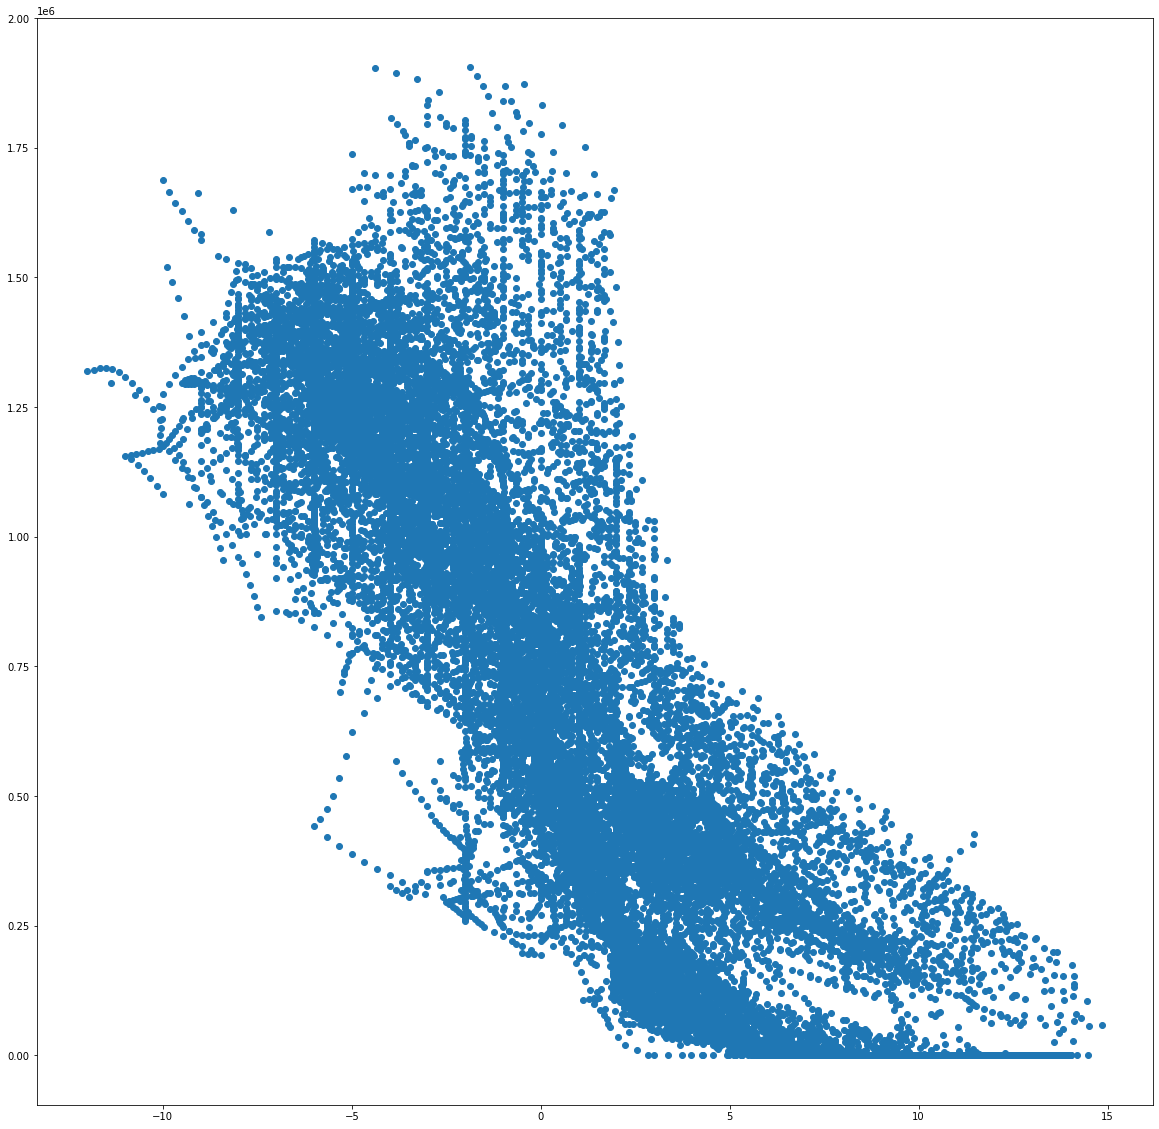

In [138]:
plt.scatter(df_final.Delta_T,df_final.Cooling)

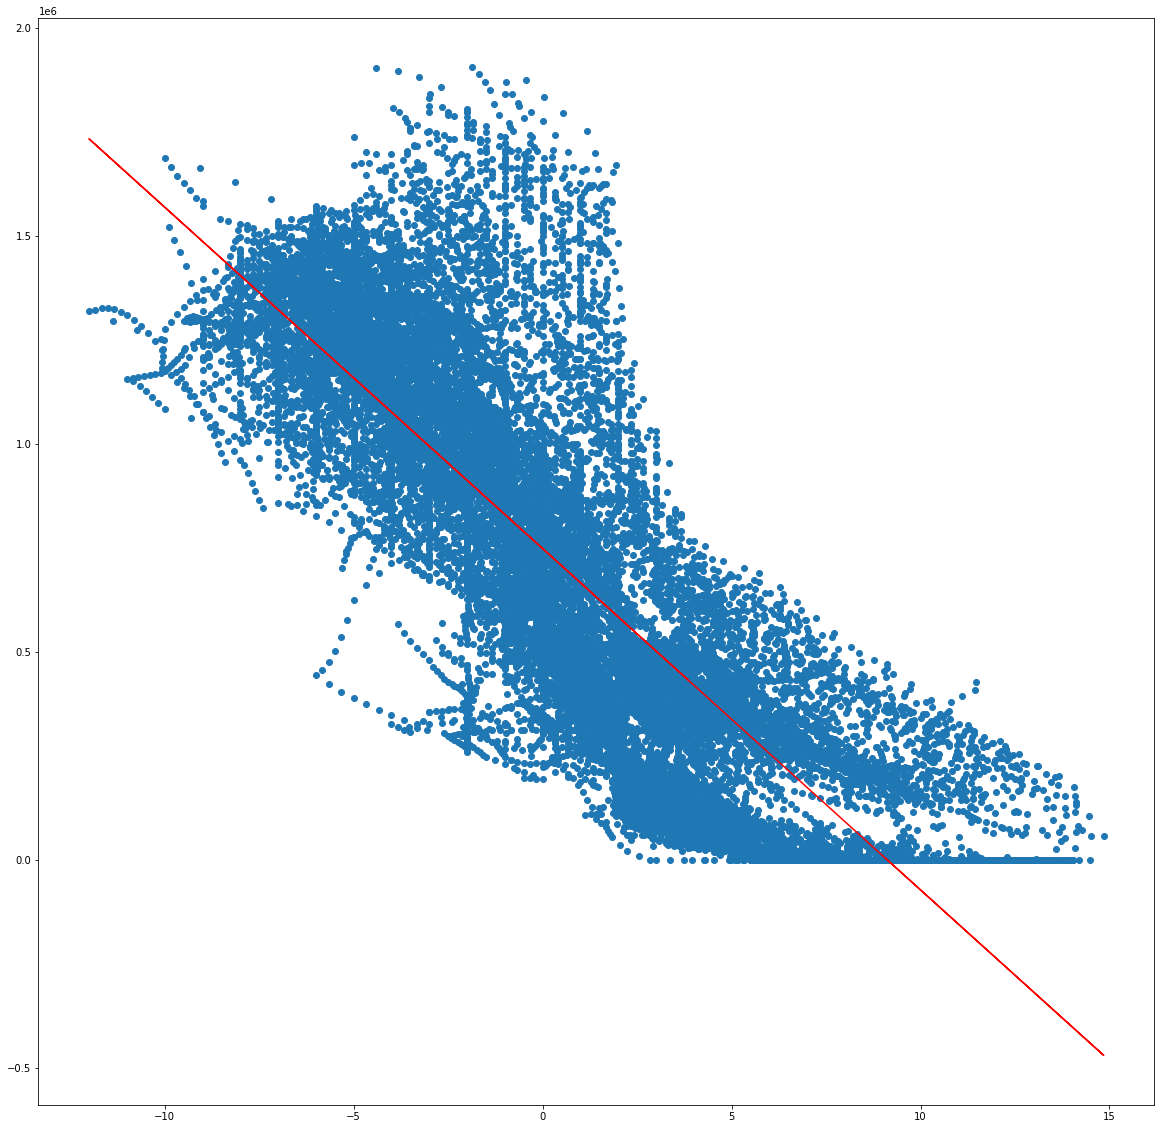

In [139]:
model = sm.OLS(df_final.Cooling,sm.add_constant(df_final.Delta_T))
results=model.fit()
plt.plot(df_final.Delta_T,results.predict(),'r')
plt.scatter(df_final.Delta_T,df_final.Cooling)

In [140]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Cooling   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                 6.426e+04
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:42:32   Log-Likelihood:            -3.6567e+05
No. Observations:               26352   AIC:                         7.313e+05
Df Residuals:                   26350   BIC:                         7.314e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.477e+05   1613.098    463.516      0.000    7.45e+05    7.51e+05
Delta_T    -8.206e+04    323.700   -253.499      0.000   -8.27e+04   -8.14e+04
==============================================================================
Omnibus:                     1423.656   Durbin-Watson:                   0.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1822.882
Skew:                           0.534   Prob(JB):                         0.00
Kurtosis:                       3.722   Cond. No.                         5.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
df_final=df_final.resample('H').mean()
df_final=df_final.dropna()

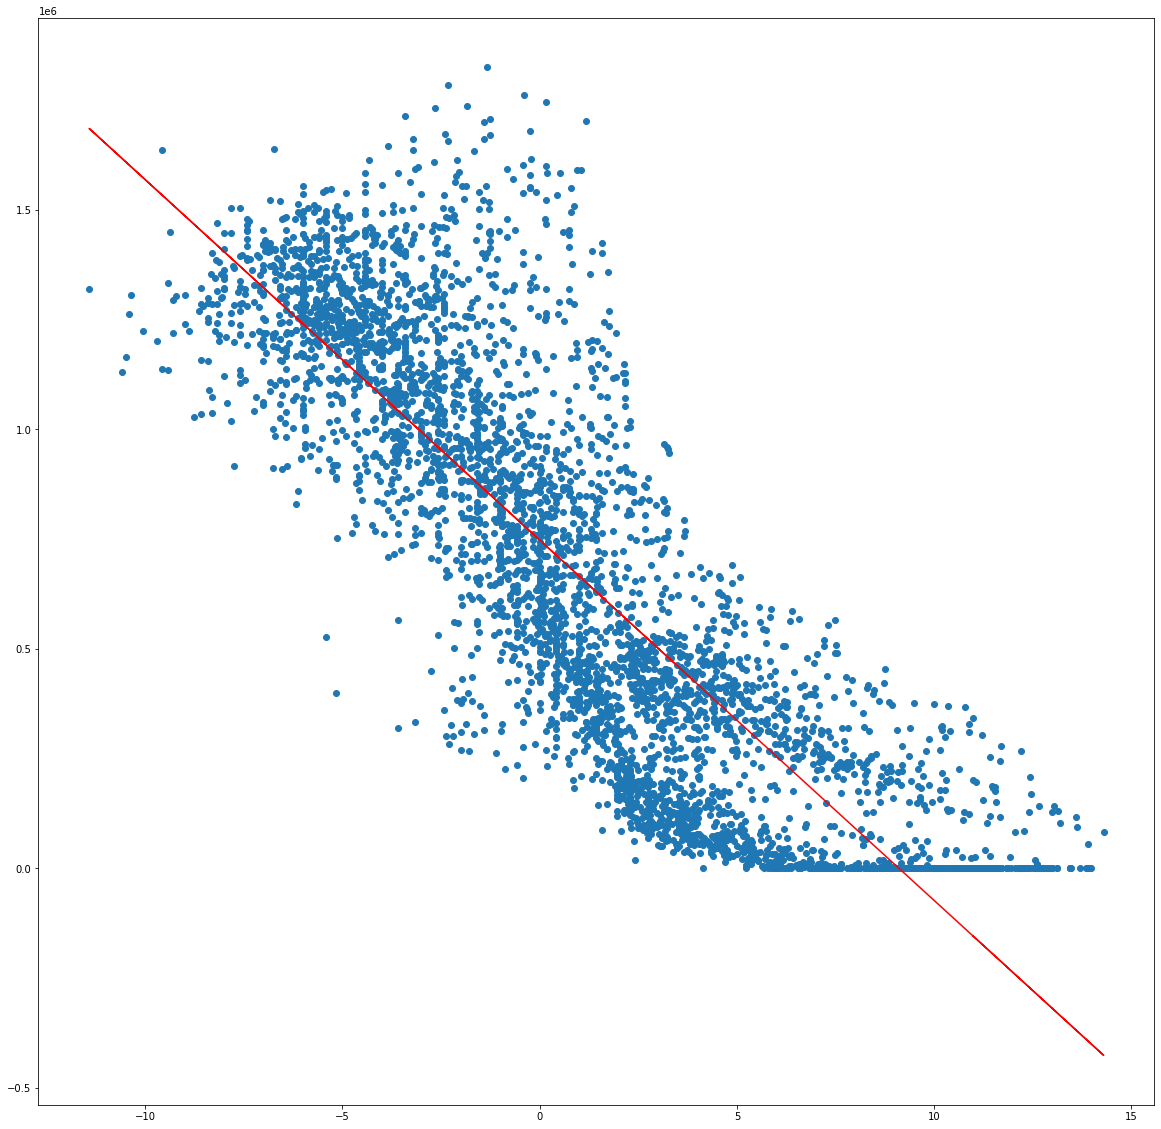

In [142]:
model = sm.OLS(df_final.Cooling,sm.add_constant(df_final.Delta_T))
results=model.fit()
plt.plot(df_final.Delta_T,results.predict(),'r')
plt.scatter(df_final.Delta_T,df_final.Cooling)

In [143]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Cooling   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                 1.132e+04
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:42:45   Log-Likelihood:                -60826.
No. Observations:                4393   AIC:                         1.217e+05
Df Residuals:                    4391   BIC:                         1.217e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.477e+05   3834.962    194.967      0.000     7.4e+05    7.55e+05
Delta_T     -8.21e+04    771.614   -106.394      0.000   -8.36e+04   -8.06e+04
==============================================================================
Omnibus:                      151.147   Durbin-Watson:                   0.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.593
Skew:                           0.429   Prob(JB):                     2.02e-38
Kurtosis:                       3.460   Cond. No.                         5.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

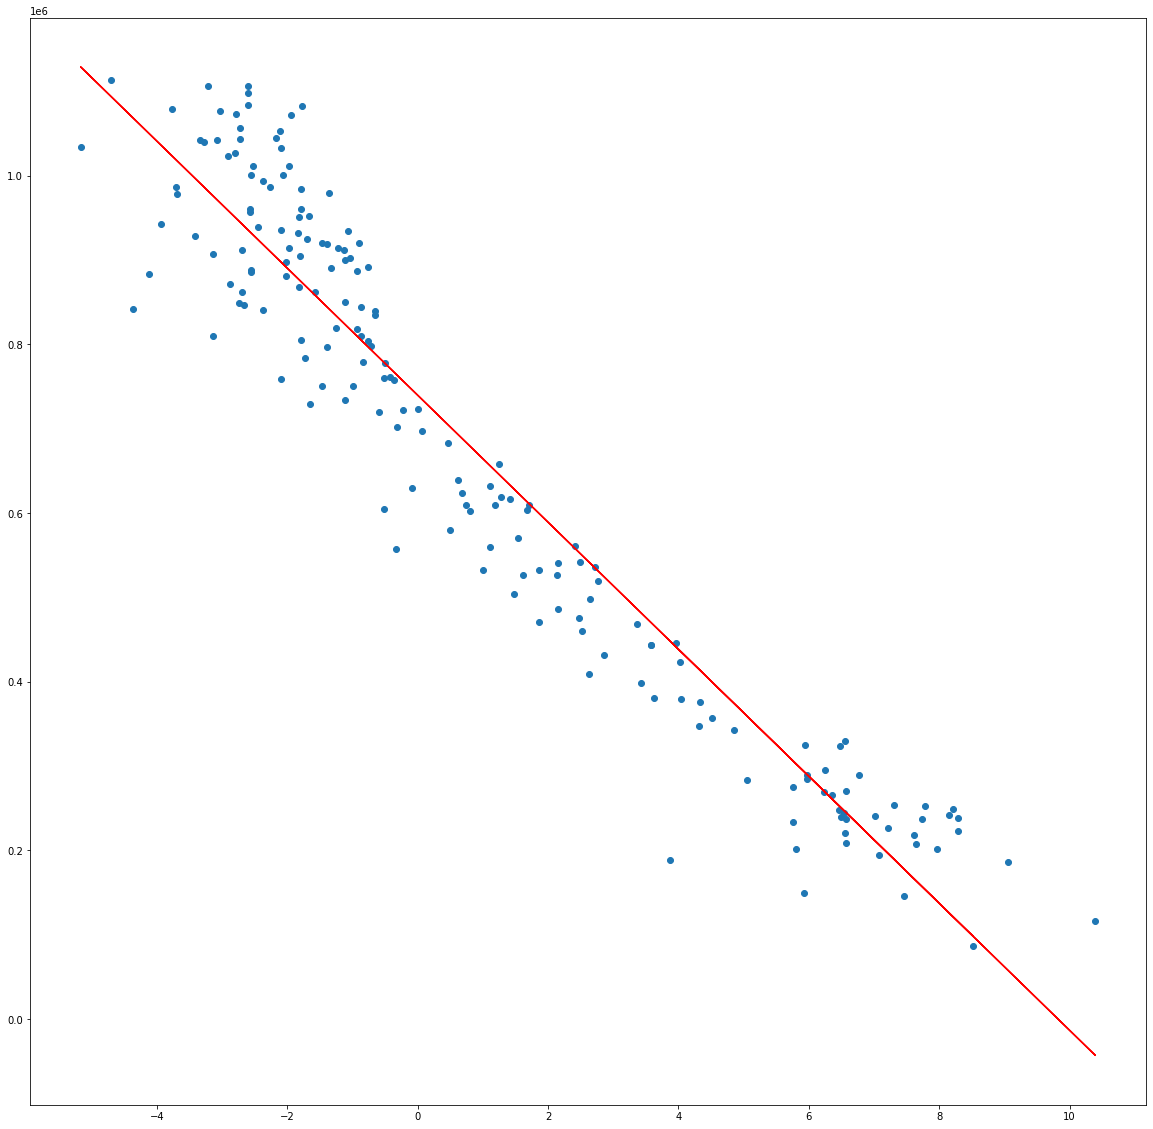

In [146]:
df_final=df_final.resample('D').mean()
df_final=df_final.dropna()
model = sm.OLS(df_final.Cooling,sm.add_constant(df_final.Delta_T))
results=model.fit()
plt.plot(df_final.Delta_T,results.predict(),'r')
plt.scatter(df_final.Delta_T,df_final.Cooling)

In [147]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Cooling   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     2010.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          2.81e-100
Time:                        11:43:52   Log-Likelihood:                -2348.4
No. Observations:                 184   AIC:                             4701.
Df Residuals:                     182   BIC:                             4707.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         7.4e+05   6465.620    114.444      0.000    7.27e+05    7.53e+05
Delta_T    -7.533e+04   1680.335    -44.828      0.000   -7.86e+04    -7.2e+04
==============================================================================
Omnibus:                        0.384   Durbin-Watson:                   0.741
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.452
Skew:                          -0.107   Prob(JB):                        0.798
Kurtosis:                       2.884   Cond. No.                         3.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

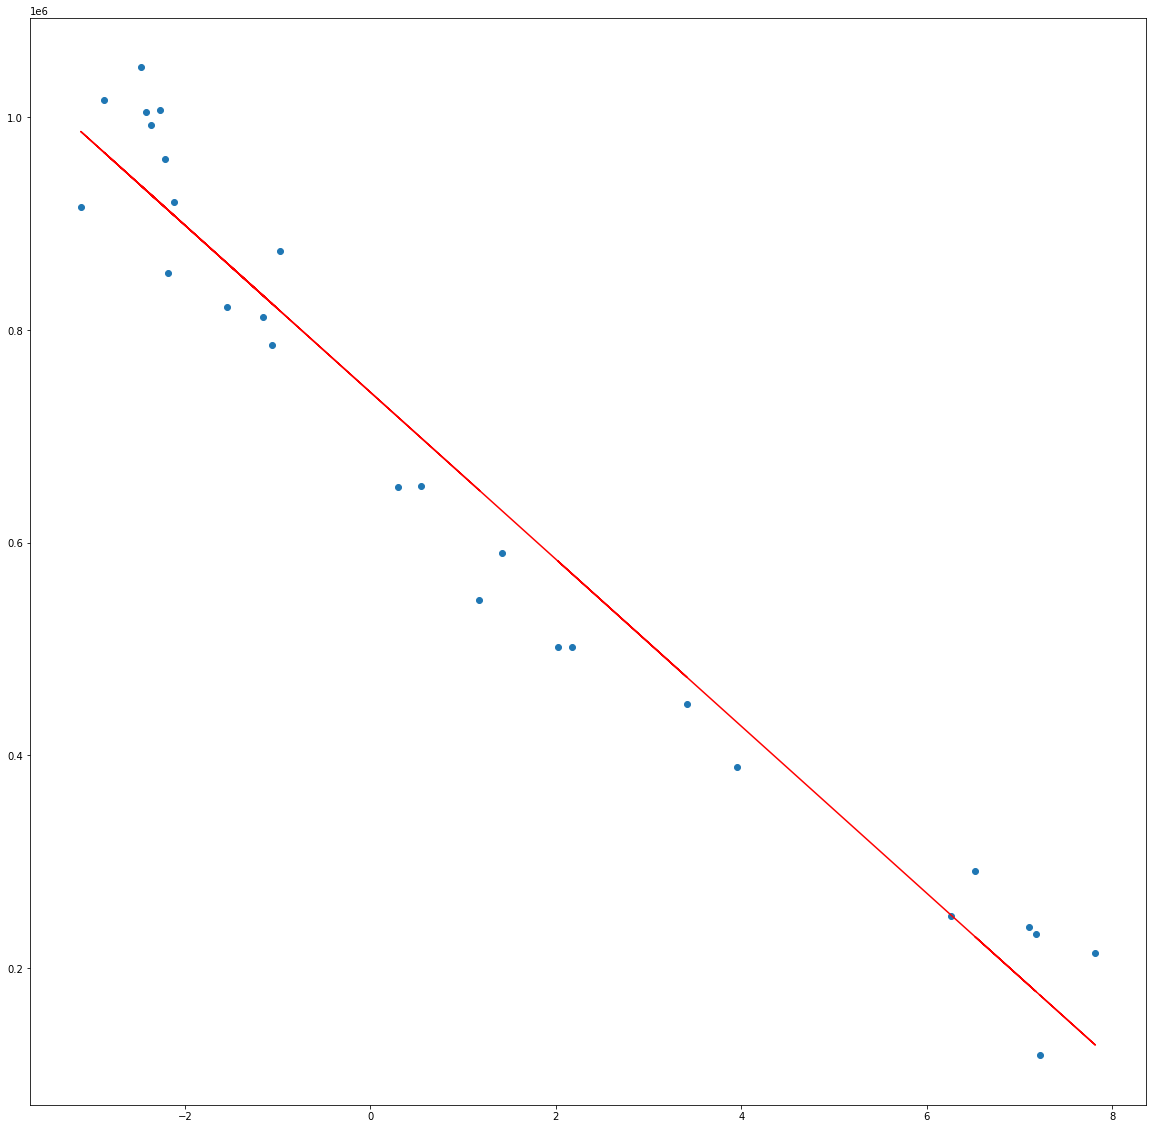

In [148]:
df_final=df_final.resample('W').mean()
df_final=df_final.dropna()
model = sm.OLS(df_final.Cooling,sm.add_constant(df_final.Delta_T))
results=model.fit()
plt.plot(df_final.Delta_T,results.predict(),'r')
plt.scatter(df_final.Delta_T,df_final.Cooling)

In [149]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Cooling   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     545.9
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           1.68e-18
Time:                        11:44:59   Log-Likelihood:                -336.09
No. Observations:                  27   AIC:                             676.2
Df Residuals:                      25   BIC:                             678.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.414e+05   1.29e+04     57.531      0.000    7.15e+05    7.68e+05
Delta_T    -7.847e+04   3358.778    -23.364      0.000   -8.54e+04   -7.16e+04
==============================================================================
Omnibus:                        8.988   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                2.259
Skew:                           0.154   Prob(JB):                        0.323
Kurtosis:                       1.617   Cond. No.                         4.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""